1. Метрики бинарной классификации
    - precision, recall
    - ROC AUC
    - F1
    
2. Деревья решений для классификации (продолжение)
    - Gini impurity index
    - Information gain
    - Деревья решений для регресии

3. *Понятие слабого эстиматора. Ансамбли.

------



# 1. Метрики бинарной классификации: Матрица ошибок

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
!pwd

In [2]:
data_train = pd.read_csv('../../2022/seminar-4-dt-clf/train.csv', index_col=0)
data_test = pd.read_csv('../../2022/seminar-4-dt-clf/train.csv', index_col=0)

num_features = ['Age', 'Fare', 'SibSp', 'Parch']

data = data_train[num_features]
X_train, X_test, y_train, y_test = train_test_split(data, data_train.Survived.values,
                                                    shuffle=True, random_state=337)

mean_age = np.round(X_train.Age.mean(), 3)
mean_fare = np.round(X_train.Fare.mean(), 3)

X_train['Age'].fillna(mean_age, inplace=True)
X_test['Age'].fillna(mean_age, inplace=True)
X_test['Fare'].fillna(mean_fare, inplace=True)

In [3]:
data_train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [4]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.loc[2]

Survived                                                    1
Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                      38.0
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17599
Fare                                                  71.2833
Cabin                                                     C85
Embarked                                                    C
Name: 2, dtype: object

In [ ]:
data_train.iloc[2]

In [ ]:
MSE = (y - f(x, B))**2 + \alpha * ||B||
log_loss = - y * log(sigmoid(x, B)) - (1-y) * log (1-sigmoid(x, B)) + \alpha * B

In [ ]:
sigmoid = 1 / (1 + e**(-B*X))

B*X = Z

In [10]:
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
# logreg.decision_function(X_test)

In [56]:
logreg.intercept_

array([-0.33473993])

In [57]:
logreg.intercept_scaling

1

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [35]:
np.allclose(y_pred, (y_pred_proba[:, 1] > 0.5).astype(int))

True

In [15]:
# p(y==0) = y_pred_proba[:, 0]
# p(y==1) = y_pred_proba[:, 1]

In [16]:
print(confusion_matrix(y_test, y_pred))

[[129   4]
 [ 67  23]]


##  Матрица ошибок (Confusion matrix)

![cmat1](confusion_matrix.png)

**Basic terminology**

- **True Positives (TP):** мы *верно* предсказали что человек выжил
- **True Negatives (TN):** мы *верно* предсказали что человек НЕ выжил
- **False Positives (FP):** мы *НЕ верно* предсказали что человек выжил (Ошибка I рода, ложно-положительная)
- **False Negatives (FN):** мы *НЕ верно* предсказали что человек НЕ выжил (Ошибка II рода, ложно-отрицательная)

#### Сохраним TP, FP, TN, FN

In [17]:
cmat = confusion_matrix(y_test, y_pred)
TP, TN, FP, FN = cmat[1, 1], cmat[0, 0], cmat[0, 1], cmat[1, 0]

In [18]:
cmat

array([[129,   4],
       [ 67,  23]])

In [19]:
y_test.sum()

90

In [20]:
def print_confusion(cmat=cmat):
    TP, TN, FP, FN = cmat[1, 1], cmat[0, 0], cmat[0, 1], cmat[1, 0]
    
    print('__________________________________________________________\n')
    print('               Predicted "0"            Predicted "1"')
    print('__________________________________________________________\n')
    print('Condition "0" True Negative            False Positive\n')
    print('                   {}                        {}'.format(TN, FP))
    print('__________________________________________________________\n')
    print('Condition "1" False Negative           True Positive\n')
    print('                   {}                        {}'.format(FN, TP))
    print('__________________________________________________________')

In [21]:
print_confusion(cmat)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   129                        4
__________________________________________________________

Condition "1" False Negative           True Positive

                   67                        23
__________________________________________________________


#### Удобно считать если есть соответствующий pandas.DataFrame

In [22]:
cmatrix = pd.DataFrame(data=y_test, columns=['True value'])
cmatrix['Predicted value'] = y_pred

pd.crosstab(index=cmatrix['True value'], columns=cmatrix['Predicted value'], margins='all')

Predicted value,0,1,All
True value,,,
0,129,4,133
1,67,23,90
All,196,27,223


##  Метрики получаемые из Confusion Matrix

1. **Accuracy**
2. Sensitivity (=True Positive Rate, Recall)
3. Specificity
4. Precision
4. ~~AUC ROC~~
5. ~~AUC PR~~
6. F1-score



----

**Accuracy**: Доля объектов чьи метки были предсказаны верно 


In [23]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
print(accuracy)

0.6816143497757847


----

**Misclassification rate = 1 - Accuracy**: Доля объектов чьи метки были предсказаны НЕ верно

In [24]:
error_rate = 1 - (TP + TN) / (TP + FP + FN + TN)
print(error_rate)

0.3183856502242153


----

**Sensitivity**: доля положительных результатов, которые правильно идентифицированы как положительные 
* Насколько классификатор *чувствителен* к обнаружению положительных примеров (примеров класса 1). Другие названя: True Positive Rate, **Recall**

In [25]:
print_confusion()

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   129                        4
__________________________________________________________

Condition "1" False Negative           True Positive

                   67                        23
__________________________________________________________


In [26]:
sensitivity = TP / (TP + FN)
print(sensitivity)

0.25555555555555554


------

**Specificity**: доля отрицательных результатов, которые правильно идентифицированы как отрицательные


In [29]:
print_confusion()

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   129                        4
__________________________________________________________

Condition "1" False Negative           True Positive

                   67                        23
__________________________________________________________


In [30]:
specificity = TN / (TN + FP)
print(specificity)

0.9699248120300752


-----

**Precision** доля верно предсказанных положительных результатов
* Какую часть 1 классификатор предсказал верно (от числа всех 1)?

In [27]:
print_confusion()

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   129                        4
__________________________________________________________

Condition "1" False Negative           True Positive

                   67                        23
__________________________________________________________


In [28]:
precision = TP / (TP + FP)
print(precision)

0.8518518518518519



### На какую метрику ориентироваться?

* Выбор метрики зависит от конкретной прикладной задачи:
    * Спам-фильтр (**Класс 1 - Спам**): *False negative* (спам проходит) приемлимо, а вот *False positive* (реальное письмо отфильтровывается) совершенно неприемлимо.
    * Детекция подозрительной банковской операции (**Класс 1 - Операция проведена злоумышленниками**): *False positive* (операция клиента заблокирована) приемлимо, а вот *False negative* (операция проведенная злоумышленниками пропущена) совершенно неприемлимо.
    
### Окей, как нам максимизировать/минимизировать какую то из этих ошибок если у нас есть конкретный классификатор?

## Выбор порогового значения предсказания (threshold)

Мы разобрали что такое Матрица ошибок (**Confusion Matrix**) и она строится на основе вектора предсказанных классов однако все классификаторы с которыми мы познакомились умеют для всякого нового объекта предсказывать **вероятность** его принадлежности тому или иному классу (в sklearn это реализовано ввиде метода *.predict_proba()*).

* Например Метод **k Ближайших Соседей** (KNN) на этапе предсказания смотрит на метки соседей и вероятность принадлежности классу 1 равна доле соседей с меткой 1, а вероятность принадлежности классу 0 - доле соседей с меткой 0.
* Метод **Решающего дерева** смотрит на долю объектов в листе в который попал тестовый объект.
* Метод **Логистической регрессии** смотрит на взвешенное расстояние до решающей гиперплоскости (взвешенное с помощью логистической функции).

и так далее.

Для получения предсказания класса вектор вероятности обрубается по порогу (threshold, $t$). По умолчанию используется пороговое значение 
$$
t = 0.5
$$

Т.е. 

$$
y(x)=\left\{
                \begin{array}{ll}
                  1, x \geq 0.5\\
                  0, x < 0.5
                  \end{array}
              \right.
$$


**ОДИН И ТОТ ЖЕ** вектор вероятностей при использовании разных $t$ может приводить к **РАЗНЫМ** векторам предсказаний классов, например:

$$
[0.3, 0.55, 0.6, 0.8] \rightarrow [0, 1, 1, 1]
$$

при использовании порога $0.5$, и:

$$
[0.3, 0.55, 0.6, 0.8] \rightarrow [0, 0, 0, 1]
$$

при использовании порога $0.7$

Что в результате повлияет на значения в Матрице ошибок и на все метрики котрые считаются на ее основе:

In [36]:
def cmatrix_at_treshold(y_true, y_predicted_proba, threshold=.5):
    return confusion_matrix(y_true,
                            np.where(y_predicted_proba[:, 1] >= threshold, 1, 0))

In [37]:
cmat50 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=.5)
cmat25 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=.25)
cmat75 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=.75)
cmat100 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=1)
cmat0 = cmatrix_at_treshold(y_test, y_pred_proba, threshold=0)

In [47]:

cmatrix_at_treshold(y_test, y_pred_proba, threshold=0.2)

array([[  4, 129],
       [  1,  89]])

In [43]:
print_confusion(cmat0)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   0                        133
__________________________________________________________

Condition "1" False Negative           True Positive

                   0                        90
__________________________________________________________


In [48]:
print_confusion(cmat25)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   12                        121
__________________________________________________________

Condition "1" False Negative           True Positive

                   2                        88
__________________________________________________________


In [49]:
print_confusion(cmat50)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   129                        4
__________________________________________________________

Condition "1" False Negative           True Positive

                   67                        23
__________________________________________________________


In [50]:
print_confusion(cmat75)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   131                        2
__________________________________________________________

Condition "1" False Negative           True Positive

                   82                        8
__________________________________________________________


In [51]:
print_confusion(cmat100)

__________________________________________________________

               Predicted "0"            Predicted "1"
__________________________________________________________

Condition "0" True Negative            False Positive

                   133                        0
__________________________________________________________

Condition "1" False Negative           True Positive

                   90                        0
__________________________________________________________


Входные данные:

* 223 объекта
    * 133 класса "0"
    * 90 класса "1"

Что происходит с нашей **Матрицей ошибок** при увеличении threshold ?

---

1. threshold = 0. Все наблюдения предсказываются как класс "1":
    * **False Positive** = 133
    * **True Positive** = 90
    * **True Negative** = 0
    * **False Negative** = 0
    * Specificity = $\frac{TN}{TN + FP} = 0$
    * Sensitivity = $\frac{TP}{TP + FN} = 1$
    
---
    
2. threshold = 0.25. Какая-то часть объектов начинает предсказываться как "0":
    * **False Positive** = 54
    * **True Positive** = 56
    * **True Negative** = 79
    * **False Negative** = 34
    * Specificity = $\frac{TN}{TN + FP} = 0.59$
    * Sensitivity = $\frac{TP}{TP + FN} = 0.64$
---
    
3. threshold = 0.75. Увеличивая пороговое значение мы уменьшаем число объектов предсказываемых как "1" и увеличиваем число объектов предсказываемых как 0:
    * **False Positive** = 12
    * **True Positive** = 26
    * **True Negative** = 121
    * **False Negative** = 64
    * Specificity = $\frac{TN}{TN + FP} = 0.9$
    * Sensitivity = $\frac{TP}{TP + FN} = 0.3$
    
    
---
    
4. threshold = 1. Наконец все объекты (за исключением тех, которые предсказаны классом "1" c *вероятностью* 1) предсказываются классом "0":
    * **False Positive** = 3
    * **True Positive** = 5
    * **True Negative** = 130
    * **False Negative** = 85
    * Specificity = $\frac{TN}{TN + FP} = 0.98$
    * Sensitivity = $\frac{TP}{TP + FN} = 0.05$
    
Таким образом балансируя пороговое значение мы можем получать классификаторы с разными **чувствительностью и специфичностью** . 

------

Кривая изменения **Чувствительности** и **Специфичности** в зависимости от выбранного порога называется ROC кривой.


### ROC curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [53]:
font = {'size'   : 22} 
plt.rc('font', **font)

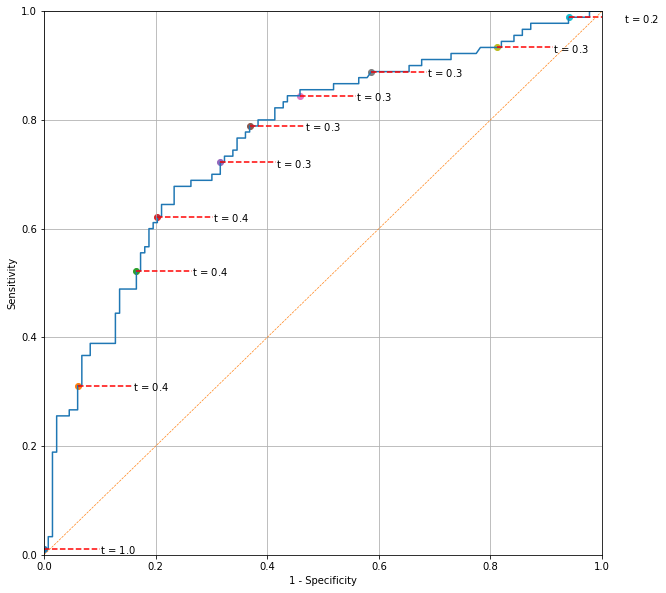

In [55]:
plt.figure(figsize=(10,10))

plt.plot(fpr, tpr)

for f,t,thresh in zip(fpr[1:-1:10], tpr[1::10], thresholds[1:-1:10]):

    plt.scatter(f, t)
    plt.plot([f, f+0.1], [t, t], ls='--', c='r')
    plt.text(f+.1, t-.01, 't = ${:.1f}$'.format(thresh))

plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity');
plt.plot([0,1], [0,1], ls='--', lw=.66)
plt.grid()
plt.xlim([0, 1])
plt.ylim([0,1]);

# plt.text()

In [ ]:
Z = (-inf, inf) = b + x1*b1 + x2*b2

sigmoid = (0, 1) = 1 / (1+exp(-Z))

Уменьшая пороговое значение мы движемся по этой кривой слева - направо, снизу - вверх.
Часто бывает что необходимо чтобы классификатор достигал определенного уровня Sensitivity или определенного уровня
Specificity этого можно достичь выбрав соответствующий порог предсказания.



----


## AUC ROC

Несмотря на то что пороговое значение влияет на величины Чувствительности и Специфичности, одна величина на этом
графике остается неизменной - Площадь под графиком.

Площадь под ROC кривой носит название ROC AUC (или AUC ROC):

Area Under the Curve Reciever Operator Characteristic

https://people.inf.elte.hu/kiss/13dwhdm/roc.pdf

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.764076858813701

------


Метрика которая в некотором смысле балансирует между Precision и Recall (Specificity) назвается

### F1-score

И это просто Гармоническое среднее Precision и Recall:

$$
F_1 = 2\times \frac{\text{Precision} \times \text{Recall}}{\text{Precision}+\text{Recall}}
$$


Ее легко обобщить для того чтобы учитывать одну из характеристик сильнее другой:

$$
F_1 = (1 + \beta^2)\times \frac{\text{Precision} \times \text{Recall}}{\beta^2 \times\text{Precision}+\text{Recall}}
$$


https://en.wikipedia.org/wiki/F1_score

-----

Аналог ROC кривой но уже изменение Precision и Recall при изменении параметра порога (**threshold**) носит название Precision Recall кривой, и конечно есть метрика Площадь под PR кривой

### AUC PR

Сравнительный анализ ROC и PR кривых можно найти в этом посте

http://www.chioka.in/differences-between-roc-auc-and-pr-auc/

Подробный разбор в этой статье

http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf

------

Хорошее объяснение вышеперечисленных метрик, а так же дополнительные материалы можно найти здесь
https://www.youtube.com/watch?v=85dtiMz9tSo

а так же в нотбуке к видео https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb